In [1]:
# tensorflow 라이브러리
import tensorflow as tf

# numpy 라이브러리
import numpy as np

# 데이터 시각화하는 라이브러리
import matplotlib.pyplot as plt

# os 모듈
import os

# 파일과 디렉토리 경로 패턴 매칭에 사용
import glob

# 이미지 처리와 조작을 위한 라이브러리
from PIL import Image

# 데이터를 Training Data와 Test Data로 나누어주는 라이브러리
from sklearn.model_selection import train_test_split

# 모델 정의하고 구성하는 데 사용되는 클래스
from tensorflow.keras.models import Model

# ResNet 모델
from tensorflow.keras.applications import ResNet50

# 데이터 전처리와 해석을 위한 함수
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# 필요한 층들을 가지고 있는 layers 라이브러리
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# optimizer를 위한 라이브러리 (Adam)
from tensorflow.keras.optimizers import Adam

# 조기 종료를 구현하기 위한 콜백 클래스
from tensorflow.keras.callbacks import EarlyStopping

# 손실 함수
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
# 데이터 가져오기 $ 데이터 전처리

data_path = "./Dataset/Train"
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", "Space"]
classes = len(categories)

w = 224
h = 224

pixels = h * w * 3

x = []
t = []
count = 150

for i, j in enumerate(categories):
    
    # One-hot Encoding
    label = [0 for k in range(classes)]
    label[i] = 1
    
    img_path = data_path + "/" + j
    files = glob.glob(img_path + "/*.jpg")[:count]
    print(j, "파일 길이 : ", len(files))
    
    # 이미지 전처리
    for k, f in enumerate(files):
  
        img = Image.open(f)
        img = img.convert("RGB")   # RGB 채널로 변환
        img = img.resize((w, h))   # 이미지 크기 조정
        data = np.asarray(img)   # numpy 배열로 변환
        x.append(data)
        t.append(label)
          
x = np.array(x)
t = np.array(t)

print('데이터 준비 및 전처리 완료!')

A 파일 길이 :  150
B 파일 길이 :  150
C 파일 길이 :  150
D 파일 길이 :  150
E 파일 길이 :  150
F 파일 길이 :  150
G 파일 길이 :  150
H 파일 길이 :  150
I 파일 길이 :  150
J 파일 길이 :  150
K 파일 길이 :  150
L 파일 길이 :  150
M 파일 길이 :  150
N 파일 길이 :  150
O 파일 길이 :  150
P 파일 길이 :  150
Q 파일 길이 :  150
R 파일 길이 :  150
S 파일 길이 :  150
T 파일 길이 :  150
U 파일 길이 :  150
V 파일 길이 :  150
W 파일 길이 :  150
X 파일 길이 :  150
Y 파일 길이 :  150
Z 파일 길이 :  150
Nothing 파일 길이 :  150
Space 파일 길이 :  150
데이터 준비 및 전처리 완료!


In [3]:
# Training Data와 Test Data로 나눠주기

x_train, x_test, t_train, t_test = train_test_split(x, t)
dataset_numpy = (x_train, x_test, t_train, t_test)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(3150, 224, 224, 3)
(3150, 28)
(1050, 224, 224, 3)
(1050, 28)


In [4]:
# 데이터 정규화

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# 모델 로드

base_model = ResNet50(include_top = False, weights = 'imagenet', 
                   input_shape = (224, 224, 3))

In [6]:
# 추가적인 레이어 생성

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(200, activation = 'relu')(x)
predictions = Dense(28, activation = 'softmax')(x)

In [7]:
# 전체 모델 정의

model = Model(inputs = base_model.input, outputs = predictions)

In [8]:
# 기존 모델 레이어 동결

for layer in base_model.layers:
    layer.trainable = False

In [9]:
# 모델 컴파일

model.compile(optimizer = Adam(), loss = CategoricalCrossentropy(), 
              metrics = ['accuracy'])

In [10]:
# Early Stopping 콜백

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, 
                               verbose = 1)

In [11]:
# 모델 학습

model.fit(x_train, t_train, batch_size = 32, epochs = 10, 
          validation_data = (x_test, t_test), callbacks = [early_stopping])

Epoch 1/10
99/99 [==============================] - 154s 2s/step - loss: 3.3688 - accuracy: 0.0448 - val_loss: 3.3158 - val_accuracy: 0.0295
Epoch 2/10
99/99 [==============================] - 151s 2s/step - loss: 3.2823 - accuracy: 0.0854 - val_loss: 3.2303 - val_accuracy: 0.1676
Epoch 3/10
99/99 [==============================] - 150s 2s/step - loss: 3.2066 - accuracy: 0.1146 - val_loss: 3.1992 - val_accuracy: 0.0829
Epoch 4/10
99/99 [==============================] - 150s 2s/step - loss: 3.0868 - accuracy: 0.1546 - val_loss: 3.0335 - val_accuracy: 0.1724
Epoch 5/10
99/99 [==============================] - 151s 2s/step - loss: 2.9428 - accuracy: 0.1829 - val_loss: 2.8665 - val_accuracy: 0.1952
Epoch 6/10
99/99 [==============================] - 150s 2s/step - loss: 2.7648 - accuracy: 0.2517 - val_loss: 2.7132 - val_accuracy: 0.2190
Epoch 7/10
99/99 [==============================] - 150s 2s/step - loss: 2.6070 - accuracy: 0.2698 - val_loss: 2.5589 - val_accuracy: 0.3248
Epoch 8/10
99

In [12]:
# 모델 평가

loss, accuracy = model.evaluate(x_test, t_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

33/33 [==============================] - 38s 1s/step - loss: 2.2192 - accuracy: 0.3705
Test Loss: 2.219214916229248
Test Accuracy: 0.3704761862754822


1/1 [==============================] - 1s 813ms/step
분류 : Y/ 정답 : R


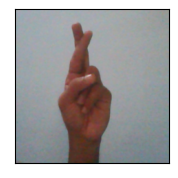

1/1 [==============================] - 0s 82ms/step
분류 : J/ 정답 : J


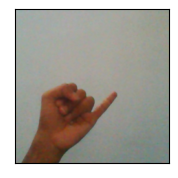

1/1 [==============================] - 0s 80ms/step
분류 : C/ 정답 : C


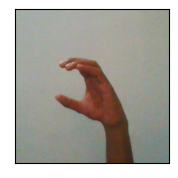

1/1 [==============================] - 0s 81ms/step
분류 : C/ 정답 : C


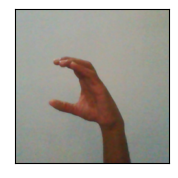

1/1 [==============================] - 0s 83ms/step
분류 : G/ 정답 : P


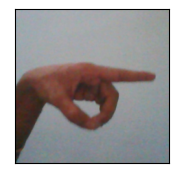

1/1 [==============================] - 0s 81ms/step
분류 : D/ 정답 : T


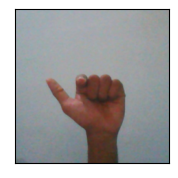

1/1 [==============================] - 0s 82ms/step
분류 : W/ 정답 : W


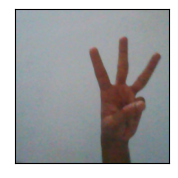

1/1 [==============================] - 0s 78ms/step
분류 : Nothing/ 정답 : Nothing


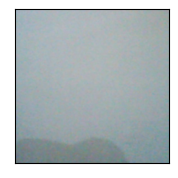

1/1 [==============================] - 0s 82ms/step
분류 : X/ 정답 : S


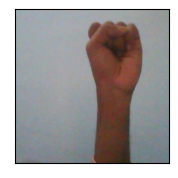

1/1 [==============================] - 0s 82ms/step
분류 : D/ 정답 : D


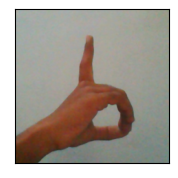

In [13]:
# 10개의 test data로 성능 확인

categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", 
              "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "Nothing", 
              "Space"]

width = 224
height = 224
channel = 3

for i in range(10, 20):
    plt.figure(figsize = (2, 2))
    
    output = model.predict(x_test[i].reshape(1, width, height, channel))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(width, height, channel), cmap = 'gray')
    
    print('분류 : ' + categories[np.argmax(output)] + '/ 정답 : ' 
          + categories[np.argmax(t_test[i])])
    plt.show()